Crie o controle de acesso para os atributos da conta. 
Obs: o atributo saldo não deve incluído, pois o mesmo deve ser atualizado através dos métodos de sacar e depositar!


In [5]:
from datetime import datetime

class Cliente:
    def __init__(self, nome, sobrenome,cpf) -> None:
        self.nome = nome
        self.sobrenome = sobrenome
        self.cpf = cpf
        
class Historico:
    def __init__(self) -> None:
        self.abertura = datetime.today()
        self.transacoes = list()
        
    def imprime(self):
        print(f"Data de abertura: {self.abertura}\nTransações: \n")
        for t in self.transacoes:
            print(f"\n{t}")

class Conta:
    def __init__(self, numero, cliente, saldo = 0, limite = 0) -> None:
        self._numero = numero
        self._titular = cliente
        self.saldo = saldo
        self._limite = limite
        self.historico = Historico()
    
    @property
    def numero(self):
        return self._numero
    
    @numero.setter
    def numero(self, valor):
        self._numero = valor
        
    @property
    def titular(self):
        return self._titular
    
    @titular.setter
    def titular(self, cliente):
        self._titular = cliente
            
    @property
    def limite(self):
        return self._limite
    
    @limite.setter
    def limite(self, valor):
        if (valor>=0):
            self._limite = valor
    
    def depositar(self, valor):
        
        if (valor>0):
            self.saldo += valor
            self.historico.transacoes.append(f"Deposito de {valor} R$ realizado com sucesso as {datetime.now()}")
            sinal = True
            
        return sinal
        
    def sacar(self, valor):
        sinal = False
        if (valor > 0 and valor <= (self.limite + self.saldo)):
            self.saldo -= valor
            self.historico.transacoes.append(f"Saque de {valor} R$ realizado com sucesso as {datetime.now()}")
            sinal = True
        return sinal
    
    def transferir(self,destino,valor):
        sinal = False
        if (isinstance(destino,Conta)):
            if valor > 0 and valor <= (self.saldo+self.limite):
                destino.saldo += valor
                self.saldo -= valor
                self.historico.transacoes.append(f"Transferencia de {valor} R$ para a conta de numero {destino.numero} realizado com sucesso as {datetime.now()}")
                destino.historico.transacoes.append(f"Transferencia de {valor} R$ recebida da conta de numero {self.numero} realizado com sucesso as {datetime.now()}")
                sinal = True
        return sinal
    
    def extrato(self):
        print(f"\nConta número: {self.numero}\nCliente: {self.titular}\nSaldo: {self.saldo}\nLimite: {self.limite}")
        

c = Conta(1,"Mauricio")
c.extrato()
c.depositar(10)
c.extrato()
c.sacar(1)
c.extrato()

d = Conta(2,"Teste")
d.extrato()

c.transferir(d,1)
c.extrato()
d.extrato()

c.historico.imprime()
d.historico.imprime()


Conta número: 1
Cliente: Mauricio
Saldo: 0
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 10
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 9
Limite: 0

Conta número: 2
Cliente: Teste
Saldo: 0
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 8
Limite: 0

Conta número: 2
Cliente: Teste
Saldo: 1
Limite: 0
Data de abertura: 2023-10-08 08:15:10.798754
Transações: 


Deposito de 10 R$ realizado com sucesso as 2023-10-08 08:15:10.798754

Saque de 1 R$ realizado com sucesso as 2023-10-08 08:15:10.798754

Transferencia de 1 R$ para a conta de numero 2 realizado com sucesso as 2023-10-08 08:15:10.798754
Data de abertura: 2023-10-08 08:15:10.798754
Transações: 


Transferencia de 1 R$ recebida da conta de numero 1 realizado com sucesso as 2023-10-08 08:15:10.798754


Crie o contador de contas na sua classe Conta.


In [8]:
from datetime import datetime

class Cliente:
    def __init__(self, nome, sobrenome,cpf) -> None:
        self.nome = nome
        self.sobrenome = sobrenome
        self.cpf = cpf
        
class Historico:
    def __init__(self) -> None:
        self.abertura = datetime.today()
        self.transacoes = list()
        
    def imprime(self):
        print(f"Data de abertura: {self.abertura}\nTransações: \n")
        for t in self.transacoes:
            print(f"\n{t}")

class Conta:
    
    _total_contas = 0
    
    def __init__(self, numero, cliente, saldo = 0, limite = 0) -> None:
        self._numero = numero
        self._titular = cliente
        self.saldo = saldo
        self._limite = limite
        self.historico = Historico()
        Conta.add_total_contas()
        
        
        
    @staticmethod
    def get_total_contas():
        return Conta._total_contas
    
    @staticmethod
    def add_total_contas():
        Conta._total_contas +=1
    
    @property
    def numero(self):
        return self._numero
    
    @numero.setter
    def numero(self, valor):
        self._numero = valor
        
    @property
    def titular(self):
        return self._titular
    
    @titular.setter
    def titular(self, cliente):
        self._titular = cliente
            
    @property
    def limite(self):
        return self._limite
    
    @limite.setter
    def limite(self, valor):
        if (valor>=0):
            self._limite = valor
    
    def depositar(self, valor):
        
        if (valor>0):
            self.saldo += valor
            self.historico.transacoes.append(f"Deposito de {valor} R$ realizado com sucesso as {datetime.now()}")
            sinal = True
            
        return sinal
        
    def sacar(self, valor):
        sinal = False
        if (valor > 0 and valor <= (self.limite + self.saldo)):
            self.saldo -= valor
            self.historico.transacoes.append(f"Saque de {valor} R$ realizado com sucesso as {datetime.now()}")
            sinal = True
        return sinal
    
    def transferir(self,destino,valor):
        sinal = False
        if (isinstance(destino,Conta)):
            if valor > 0 and valor <= (self.saldo+self.limite):
                destino.saldo += valor
                self.saldo -= valor
                self.historico.transacoes.append(f"Transferencia de {valor} R$ para a conta de numero {destino.numero} realizado com sucesso as {datetime.now()}")
                destino.historico.transacoes.append(f"Transferencia de {valor} R$ recebida da conta de numero {self.numero} realizado com sucesso as {datetime.now()}")
                sinal = True
        return sinal
    
    def extrato(self):
        print(f"\nConta número: {self.numero}\nCliente: {self.titular}\nSaldo: {self.saldo}\nLimite: {self.limite}")
        

c = Conta(1,"Mauricio")
c.extrato()
c.depositar(10)
c.extrato()
c.sacar(1)
c.extrato()

print(c.get_total_contas())

d = Conta(2,"Teste")
d.extrato()

c.transferir(d,1)
c.extrato()
d.extrato()

c.historico.imprime()
d.historico.imprime()


print(d.get_total_contas())



Conta número: 1
Cliente: Mauricio
Saldo: 0
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 10
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 9
Limite: 0
1

Conta número: 2
Cliente: Teste
Saldo: 0
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 8
Limite: 0

Conta número: 2
Cliente: Teste
Saldo: 1
Limite: 0
Data de abertura: 2023-10-08 08:21:25.966808
Transações: 


Deposito de 10 R$ realizado com sucesso as 2023-10-08 08:21:25.966808

Saque de 1 R$ realizado com sucesso as 2023-10-08 08:21:25.967807

Transferencia de 1 R$ para a conta de numero 2 realizado com sucesso as 2023-10-08 08:21:25.967807
Data de abertura: 2023-10-08 08:21:25.967808
Transações: 


Transferencia de 1 R$ recebida da conta de numero 1 realizado com sucesso as 2023-10-08 08:21:25.967807
2


Crie Slots em sua classe Conta;


In [9]:
from datetime import datetime

class Cliente:
    def __init__(self, nome, sobrenome,cpf) -> None:
        self.nome = nome
        self.sobrenome = sobrenome
        self.cpf = cpf
        
class Historico:
    def __init__(self) -> None:
        self.abertura = datetime.today()
        self.transacoes = list()
        
    def imprime(self):
        print(f"Data de abertura: {self.abertura}\nTransações: \n")
        for t in self.transacoes:
            print(f"\n{t}")

class Conta:
    
    _total_contas = 0
    
    __slots__ = ["_numero", "_titular", "saldo","_limite","historico"]
    
    def __init__(self, numero, cliente, saldo = 0, limite = 0) -> None:
        self._numero = numero
        self._titular = cliente
        self.saldo = saldo
        self._limite = limite
        self.historico = Historico()
        Conta.add_total_contas()
        
        
        
    @staticmethod
    def get_total_contas():
        return Conta._total_contas
    
    @staticmethod
    def add_total_contas():
        Conta._total_contas +=1
    
    @property
    def numero(self):
        return self._numero
    
    @numero.setter
    def numero(self, valor):
        self._numero = valor
        
    @property
    def titular(self):
        return self._titular
    
    @titular.setter
    def titular(self, cliente):
        self._titular = cliente
            
    @property
    def limite(self):
        return self._limite
    
    @limite.setter
    def limite(self, valor):
        if (valor>=0):
            self._limite = valor
    
    def depositar(self, valor):
        
        if (valor>0):
            self.saldo += valor
            self.historico.transacoes.append(f"Deposito de {valor} R$ realizado com sucesso as {datetime.now()}")
            sinal = True
            
        return sinal
        
    def sacar(self, valor):
        sinal = False
        if (valor > 0 and valor <= (self.limite + self.saldo)):
            self.saldo -= valor
            self.historico.transacoes.append(f"Saque de {valor} R$ realizado com sucesso as {datetime.now()}")
            sinal = True
        return sinal
    
    def transferir(self,destino,valor):
        sinal = False
        if (isinstance(destino,Conta)):
            if valor > 0 and valor <= (self.saldo+self.limite):
                destino.saldo += valor
                self.saldo -= valor
                self.historico.transacoes.append(f"Transferencia de {valor} R$ para a conta de numero {destino.numero} realizado com sucesso as {datetime.now()}")
                destino.historico.transacoes.append(f"Transferencia de {valor} R$ recebida da conta de numero {self.numero} realizado com sucesso as {datetime.now()}")
                sinal = True
        return sinal
    
    def extrato(self):
        print(f"\nConta número: {self.numero}\nCliente: {self.titular}\nSaldo: {self.saldo}\nLimite: {self.limite}")
        

c = Conta(1,"Mauricio")
c.extrato()
c.depositar(10)
c.extrato()
c.sacar(1)
c.extrato()

print(c.get_total_contas())

d = Conta(2,"Teste")
d.extrato()

c.transferir(d,1)
c.extrato()
d.extrato()

c.historico.imprime()
d.historico.imprime()


print(d.get_total_contas())



Conta número: 1
Cliente: Mauricio
Saldo: 0
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 10
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 9
Limite: 0
1

Conta número: 2
Cliente: Teste
Saldo: 0
Limite: 0

Conta número: 1
Cliente: Mauricio
Saldo: 8
Limite: 0

Conta número: 2
Cliente: Teste
Saldo: 1
Limite: 0
Data de abertura: 2023-10-08 08:23:09.949678
Transações: 


Deposito de 10 R$ realizado com sucesso as 2023-10-08 08:23:09.949677

Saque de 1 R$ realizado com sucesso as 2023-10-08 08:23:09.949677

Transferencia de 1 R$ para a conta de numero 2 realizado com sucesso as 2023-10-08 08:23:09.949677
Data de abertura: 2023-10-08 08:23:09.949678
Transações: 


Transferencia de 1 R$ recebida da conta de numero 1 realizado com sucesso as 2023-10-08 08:23:09.949677
2


Similar à classe Conta criada em sala de aula, crie uma classe Fotografia. ́
A classe Fotografia terá os seguintes atributos: 
    Foto -> strcom endereço da imagem (o atributo deverá armazenar a imagem e não o endereço dela, dica: fromskimage.ioimportimread)Fotógrafo -> Pessoa com Nome, CPF, Endereço e telefone
    Data -> data que a fotografia foi obtida 
    Proprietário -> Pessoa 
    Quantidade de Fotos -> contador para quantidade de objetos Fotografia criados 

    A classe Fotografia terá os seguintes métodos: 
    Mostrar Fotografia (dica: frommatplotlib.pyplotimportimshow) 
    Propriedades da Fotografia: tamanho da Fotografia em pixels (dica: fotografia.shape), fotógrafo, data 
    Métodos para alterar e acessar atributos. 
    Crie Slots

Propriedades (173, 640, 3)
2023-10-08 09:07:01.700612
Fotografo: Mauricio, 1234, Bocaina, 5678


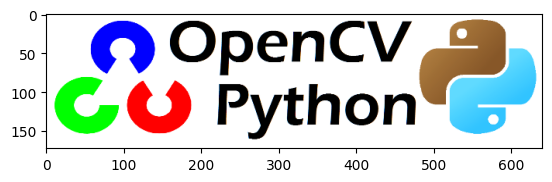

In [1]:
from datetime import datetime
import cv2
import matplotlib.pyplot as plt

class Pessoa:
    __slots__ = ["_nome","_cpf","_endereco","_telefone"]
    
    def __init__(self, nome, cpf, endereco, telefone):
        self._nome = nome
        self._cpf = cpf
        self._endereco = endereco
        self._telefone = telefone
        
    @property
    def nome(self):
        return self._nome

    @property
    def cpf(self):
        return self._cpf

    @property
    def endereco(self):
        return self._endereco

    @property
    def telefone(self):
        return self._telefone
        

class Fotografia:
    
    __slots__ = ["_foto","_fotografo","_data","_proprietario"]
    
    _total_fotografias = 0
    
    def __init__(self, foto, fotografo, data, proprietario) -> None:
        try:
            self._foto = cv2.imread(foto)
        except:
            print("\nImagen Invalida!")
            
        self._fotografo = fotografo
        self._data = data
        self._proprietario = proprietario
        
        Fotografia.add_total_fotografias()
        
    @staticmethod
    def get_total_fotografias():
        return Fotografia._total_fotografias
    
    @staticmethod
    def add_total_fotografias():
        Fotografia._total_fotografias +=1
        
        
    @property
    def foto(self):
        return self.foto
    
    @foto.setter
    def foto(self,foto):
        try:
            self._foto = cv2.imread(foto)
        except:
            print("\nImagen Invalida!")
            
    @property
    def fotografo(self):
        return self._fotografo
    
    @fotografo.setter
    def fotografo(self,fotografo):
        self._fotografo = fotografo
        
    @property
    def data(self):
        return self._data
    
    @data.setter
    def data(self,data):
        self._data = data
    
    @property
    def proprietario(self):
        return self._proprietario
    
    @data.setter
    def proprietario(self,proprietario):
        self._proprietario = proprietario
            
        
    def mostrar_fotografia(self):
        plt.imshow(self._foto)
        
    def propriedades(self):
        print(f"Propriedades {self._foto.shape}")

fotografo = Pessoa("Mauricio","1234","Bocaina","5678")
cliente = Pessoa("Teste","111","Endereço","222")
f = Fotografia(foto='R.png',fotografo=fotografo,data=datetime.now(),proprietario=cliente)

f.mostrar_fotografia()
f.propriedades()
print(f.data)
print(f.fotografo)
print(f"Fotografo: {f.fotografo.nome}, {f.fotografo.cpf}, {f.fotografo.endereco}, {f.fotografo.telefone}")


In [8]:
!pip install opencv-python
!pip install matplotlib
!matplotlib inline

'matplotlib' n�o � reconhecido como um comando interno
ou externo, um programa oper�vel ou um arquivo em lotes.
